# Excercise 6 - Title

notes for later: arcpy only works on windows, just like arcgis

Description: 

In this exercise we will 



## Set up

In [1]:
# import python packages

import sys
import glob2 as glob
from osgeo import ogr,gdal
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# conda env packages: glob2, gdal, geopandas, fiona, juptyer
# create conda env from DEV_py_demo yml file


In [ ]:
# help(fiona)
# 

In [3]:
# list any files or directories we will use

# data_dir = 'C://Users/kerrie/Documents/ArcGIS/Projects/DEV_python/export_gdb_data/' # update to wherever you exported your data
workspace_dir = r'C://Users/kerrie/Documents/01_LocalCode/repos/MSU_example_compute/python/DEV_python_canvas_course/' # update to wherever you saved your jupyter notebook
# gdb_file='C://Users/kerrie/Documents/ArcGIS/Projects/DEV_python/Ex_02/Ex2_GIS_data/Ex2_GISdata.gdb'
gdb_file=workspace_dir+r'data/Ex_06/Ex6_GIS_data/Ex6_GISdata.gdb'
town_file=workspace_dir+r'data/Ex_06/Ex6_GIS_data/towns.shp'
bound_file=workspace_dir+r'data/Ex_06/cb_2018_us_state_20m.shp'

## Subtitle 

brief info


In [ ]:
fiona.listlayers(gdb_file)

In [20]:
# what happens when we read a shapefile?

towns=gpd.read_file(town_file)
towns 


,OBJECTID,FID_Commun,AREA,PERIMETER,NAME,COUNTY,CONAME,geometry
0,1,668,0.0,0.0,Morgantown,105,Oktibbeha,POINT (570114.717 1389589.134)
1,2,662,0.0,0.0,Craig Springs,105,Oktibbeha,POINT (577013.621 1390688.832)
2,3,658,0.0,0.0,Oktoc,105,Oktibbeha,POINT (592356.901 1392731.650)
3,4,640,0.0,0.0,Bugh,105,Oktibbeha,POINT (569626.133 1396300.530)
4,5,638,0.0,0.0,Bradley,105,Oktibbeha,POINT (571635.452 1397239.239)
5,6,1734,0.0,0.0,Seitz,105,Oktibbeha,POINT (573495.475 1398275.696)
6,7,635,0.0,0.0,Pleasant Ridge,105,Oktibbeha,POINT (569584.493 1398518.446)
7,8,628,0.0,0.0,Longview,105,Oktibbeha,POINT (577089.893 1400545.894)
8,9,1736,0.0,0.0,Deerfield,105,Oktibbeha,POINT (584481.700 1401869.317)
9,10,623,0.0,0.0,Sessums,105,Oktibbeha,POINT (596325.660 1402074.696)


'towns' is read in as a geodataframe. This structure is based on the python called package pandas which handles tabular data in structures called dataframes. We use the geopandas package here to work with data in structures called geodataframes. It's just a dataframe with addtional geographical information attached, for example the coordinate reference system (crs).

In [24]:
# where is the geographical info stored?

towns.crs

<Projected CRS: PROJCS["mstm",GEOGCS["NAD83",DATUM["North_American ...>
Name: mstm
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In pandas, each column of a dataframe is called a series. In geopandas, the column(s) named geometry which contain the points, lines, and/or polygons are called geoseries and the other columns are called series. You can access a series or geoseries in a geodataframe using brackets+colum name in quotes or a dot+column name. If the column name contains characters other than letters or underscore (e.g. spaces, dashes, punctuation), you must use brackets to access the data. 

In [38]:
towns.NAME

0          Morgantown
1       Craig Springs
2               Oktoc
3                Bugh
4             Bradley
5               Seitz
6      Pleasant Ridge
7            Longview
8           Deerfield
9             Sessums
10          Blackjack
11      State College
12         Self Creek
13    Clayton Village
14             Adaton
15     Double Springs
16       Center Grove
17             Osborn
18         Rocky Hill
19              Bells
20             Plairs
21            Muldrow
Name: NAME, dtype: object

In [39]:
towns['geometry']

0     POINT (570114.717 1389589.134)
1     POINT (577013.621 1390688.832)
2     POINT (592356.901 1392731.650)
3     POINT (569626.133 1396300.530)
4     POINT (571635.452 1397239.239)
5     POINT (573495.475 1398275.696)
6     POINT (569584.493 1398518.446)
7     POINT (577089.893 1400545.894)
8     POINT (584481.700 1401869.317)
9     POINT (596325.660 1402074.696)
10    POINT (594569.155 1405140.036)
11    POINT (589857.687 1405924.967)
12    POINT (568667.807 1407292.025)
13    POINT (592388.499 1408444.540)
14    POINT (576998.332 1408679.174)
15    POINT (564036.521 1409046.389)
16    POINT (567344.840 1412119.471)
17    POINT (595460.656 1413742.494)
18    POINT (588232.221 1414105.485)
19    POINT (580397.222 1415885.540)
20    POINT (582667.134 1415935.138)
21    POINT (597082.534 1416562.482)
Name: geometry, dtype: geometry

In [4]:
fiona.listlayers(gdb_file)
fiona.listlayers(bound_file)

['cb_2018_us_state_20m']

In [ ]:
# gdb_data=gpd.read_file(gdb_file)
# gdb_data.columns

In [30]:
# county=gpd.read_file(gdb_file,layer='VolusiaCounty')
# county
state_bound=gpd.read_file(bound_file)
ms=state_bound.loc[state_bound['STUSPS']=='MS']
ms


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
41,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"POLYGON ((-91.62136 31.26781, -91.56419 31.261..."


In [31]:
ms.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [32]:
ms=ms.to_crs(crs=towns.crs)
ms.crs

<Projected CRS: PROJCS["mstm",GEOGCS["NAD83",DATUM["North_American ...>
Name: mstm
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

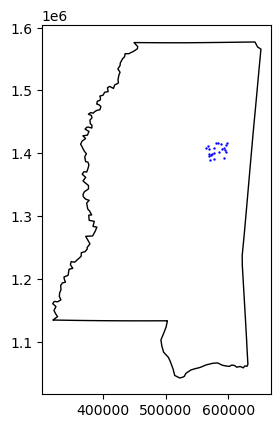

In [44]:
fig, ax = plt.subplots()
# county.plot(ax=ax,color='white',edgecolor='black')
ms.plot(ax=ax,color='white',edgecolor='black')
towns.plot(ax=ax,marker='o',color='blue',markersize=0.5)
plt.show()

## Creating buffers

In [40]:
town_buffer=towns.geometry.buffer(5000)
town_buffer

0     POLYGON ((575114.717 1389589.134, 575090.640 1...
1     POLYGON ((582013.621 1390688.832, 581989.544 1...
2     POLYGON ((597356.901 1392731.650, 597332.824 1...
3     POLYGON ((574626.133 1396300.530, 574602.057 1...
4     POLYGON ((576635.452 1397239.239, 576611.376 1...
5     POLYGON ((578495.475 1398275.696, 578471.398 1...
6     POLYGON ((574584.493 1398518.446, 574560.416 1...
7     POLYGON ((582089.893 1400545.894, 582065.817 1...
8     POLYGON ((589481.700 1401869.317, 589457.623 1...
9     POLYGON ((601325.660 1402074.696, 601301.583 1...
10    POLYGON ((599569.155 1405140.036, 599545.079 1...
11    POLYGON ((594857.687 1405924.967, 594833.610 1...
12    POLYGON ((573667.807 1407292.025, 573643.731 1...
13    POLYGON ((597388.499 1408444.540, 597364.423 1...
14    POLYGON ((581998.332 1408679.174, 581974.255 1...
15    POLYGON ((569036.521 1409046.389, 569012.445 1...
16    POLYGON ((572344.840 1412119.471, 572320.763 1...
17    POLYGON ((600460.656 1413742.494, 600436.5

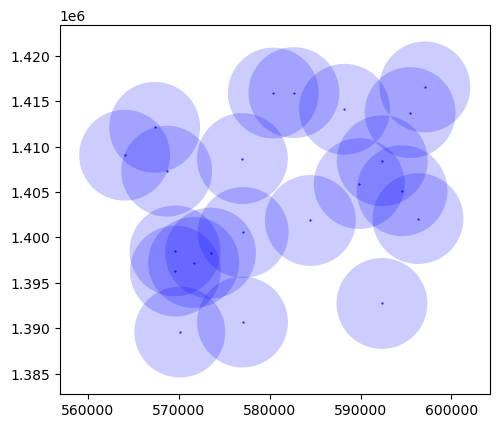

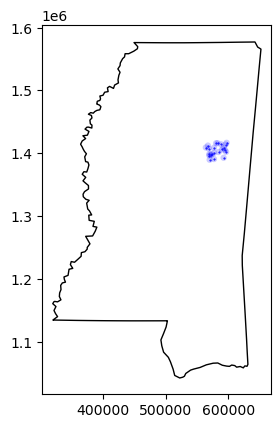

In [52]:
fig, ax = plt.subplots()
towns.plot(ax=ax,marker='.',color='blue',markersize=1)
town_buffer.plot(ax=ax,color='blue',alpha=0.2)
plt.show()

fig, ax = plt.subplots()
ms.plot(ax=ax,color='white',edgecolor='black')
towns.plot(ax=ax,marker='.',color='blue',markersize=1)
town_buffer.plot(ax=ax,color='blue',alpha=0.2)
plt.show()


repeat with schools

In [54]:
schools=gpd.read_file(gdb_file,layer='public_schools')
school_buffer=schools.geometry.buffer(2500)
school_buffer.crs

<Projected CRS: PROJCS["mstm",GEOGCS["NAD83",DATUM["North_American ...>
Name: mstm
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

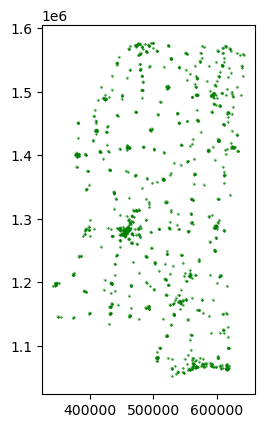

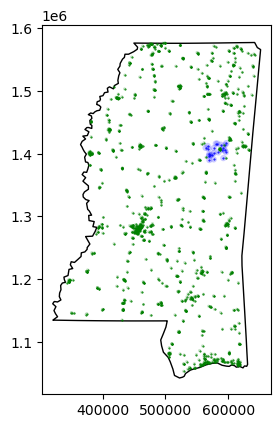

In [55]:
fig, ax = plt.subplots()
schools.plot(ax=ax,marker='.',color='green',markersize=1)
school_buffer.plot(ax=ax,color='green',alpha=0.2)
plt.show()

fig, ax = plt.subplots()
ms.plot(ax=ax,color='white',edgecolor='black')
towns.plot(ax=ax,marker='.',color='blue',markersize=1)
town_buffer.plot(ax=ax,color='blue',alpha=0.2)
schools.plot(ax=ax,marker='.',color='green',markersize=1)
school_buffer.plot(ax=ax,color='green',alpha=0.2)
plt.show()


# Get info about each data layer

how many schools and town are in the data? The number of schools or towns is the same as the number of rows in each geodataframe. We can find the number of rows using len()

In [57]:
len(schools), len(towns)

(1062, 22)

What's the data type of these items?

Using python and geopandas, vector data (points,lines,polygons) in shapefiles and geodatabases are read in as tabular data in a geodataframe structure and shapes are stored in the geoseries column (geometry) of the geodataframe. The data type of a geodataframe is an object. There is no "feature class" etc data type.

Raster data...

In [62]:
towns.NAME.dtype

dtype('O')

## Dissolve and Unary Union (many features to one feature)

When you want to turn many points, lines or polygons into a single feature, you can use geopandas dissolve or unary union on a geoseries (the geometry column of a geodataframe). 

As you will see, unary union takes a geoseries of polygons and returns a single polygon object.  that was  whereas dissolve takes multiple columns from a geodataframe and returns a geodataframe containing a single polygon object as well as any other columns in the input geodataframe.

We demonstrated by first creating a 1km buffer around each highway, then using dissolve and unary union.

<Axes: >

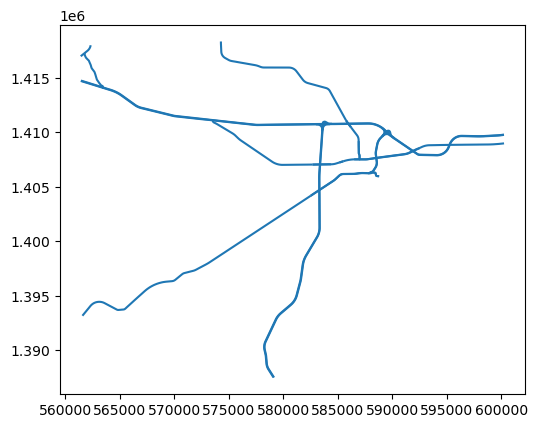

In [133]:
highways=gpd.read_file(gdb_file,layer='desig_hwys_105')
highways.plot()

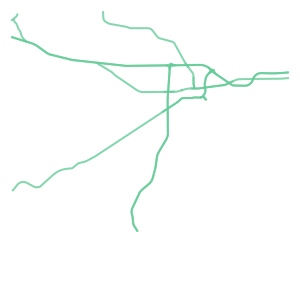

In [138]:
test=highways.unary_union
test

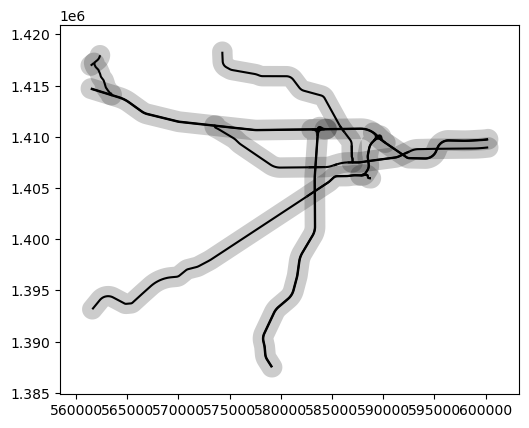

In [68]:
hw_buffer=highways.buffer(1000)

fig, ax = plt.subplots()
highways.plot(ax=ax,color='black')
hw_buffer.plot(ax=ax,color='black',alpha=0.2)
plt.show()

In [69]:
hw_buffer

0    POLYGON ((560821.520 1393799.321, 560980.734 1...
1    POLYGON ((560748.409 1417683.907, 560799.072 1...
2    POLYGON ((578235.046 1387008.390, 578219.099 1...
3    POLYGON ((589780.303 1405758.383, 589759.563 1...
4    POLYGON ((560445.701 1414709.059, 560444.715 1...
5    POLYGON ((572537.836 1410950.743, 572533.295 1...
6    POLYGON ((584215.502 1411723.669, 584269.155 1...
7    POLYGON ((560797.902 1416969.586, 560778.414 1...
8    POLYGON ((575314.701 1417584.307, 575408.644 1...
dtype: geometry

Notice how the buffers (and highways) are 9 different items. We now have highways (a geodataframe) and hw_buffer (a geoseries).

Also notice how the highways geodataframe, the geometry geoseries in highways, and the hw_buffer geoseries are all associated with a coordinate reference system (try highways.crs, highways.geometry.crs, hw_buffer.crs)

Let's first look at unary union. We apply unary_union to the hw_buffer geoseries and get a polygon object. This object was created in the same coordinate reference system but polygons don't carry crs metadata with them(hwbuff_poly.crs is not a thing)

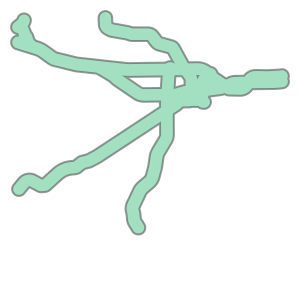

In [86]:
# use unary_union on a geoseries
# the returned object is a single polygon
hwbuff_poly=hw_buffer.unary_union
hwbuff_poly

In [88]:
# How do we know hwbuff_poly is a single polygon? 
# You can use print() to see the coordinates of each node of a very, very large polygon.

# print(hwbuff_poly)

Now let's look at dissolve. Dissolve operates on multiple columns of a geodataframe: the geometry column (geoseries) as well as another column used to group the items in the geoseries.

First let's look at the entire geodataframe and create a single object of all highways. We will need the geometry column and a column that will group all rows in the geodataframe to a single group- the COUNTY or CONAME columns will work for this because every row in the geodataframe has the same value. See below

In [90]:
highways

,FID_Design,OBJECTID,LENGTH,HWYNAME,CLASS,ALT1_DESIN,ALT2_DESIN,ALT3_DESIN,ALT4_DESIN,ALT5_DESIN,ALT6_DESIN,ALT7_DESIN,Shape_Leng,COUNTY,CONAME,Shape_Length,geometry
0,7,17,276463.000000,MS 12,3,,,,,,,,276462.888026,105,Oktibbeha,49174.035325,"MULTILINESTRING ((589023.188 1410399.500, 5890..."
1,42,473,533449.000000,MS 15,3,,,,,,,,533448.629669,105,Oktibbeha,1394.513838,"MULTILINESTRING ((561763.938 1417226.500, 5618..."
2,48,691,565231.000000,MS 25,3,,,,,,,,565230.984691,105,Oktibbeha,53270.399926,"MULTILINESTRING ((583624.110 1410747.882, 5836..."
3,76,1430,2325.679932,MS 775,4,,,,,,,,2325.676707,105,Oktibbeha,2325.676707,"MULTILINESTRING ((587926.625 1406252.250, 5880..."
4,220,3749,445627.000000,US 82,2,,,,,,,,445627.161195,105,Oktibbeha,47324.698902,"MULTILINESTRING ((561444.700 1414726.152, 5614..."
5,376,6480,97637.000000,MS 182,4,,,,,,,,97636.998383,105,Oktibbeha,36648.665211,"MULTILINESTRING ((573624.790 1411093.497, 5735..."
6,377,6499,36317.101562,US 82,2,,,MS 25,,,,,36317.066342,105,Oktibbeha,35158.821467,"MULTILINESTRING ((585969.203 1410779.478, 5861..."
7,458,7259,3787.820068,MS 763,4,,,,,,,,3787.817374,105,Oktibbeha,3787.817374,"MULTILINESTRING ((561763.938 1417226.500, 5617..."
8,547,8180,42944.199219,MS 389,4,,,,,,,,43324.138603,105,Oktibbeha,21716.753644,"MULTILINESTRING ((585759.312 1411092.375, 5857..."


Now we use dissolve to combine all the individual multilinestring objects in the geometry column into a single large multilinestring object. 

When we use dissolve on the geodataframe and save to a new variable name, we get a new geodataframe stored in that variable (hw_dissolve). The new geodataframe is now indexed by COUNTY and contains a single record (row) with a single multilinestring object in the geometry column. 

In [91]:
hw_dissolve=highways.dissolve(by='COUNTY')
hw_dissolve

,geometry,FID_Design,OBJECTID,LENGTH,HWYNAME,CLASS,ALT1_DESIN,ALT2_DESIN,ALT3_DESIN,ALT4_DESIN,ALT5_DESIN,ALT6_DESIN,ALT7_DESIN,Shape_Leng,CONAME,Shape_Length
COUNTY,,,,,,,,,,,,,,,,
105,"MULTILINESTRING ((589023.188 1410399.500, 5890...",7,17,276463.0,MS 12,3,,,,,,,,276462.888026,Oktibbeha,49174.035325


<Axes: >

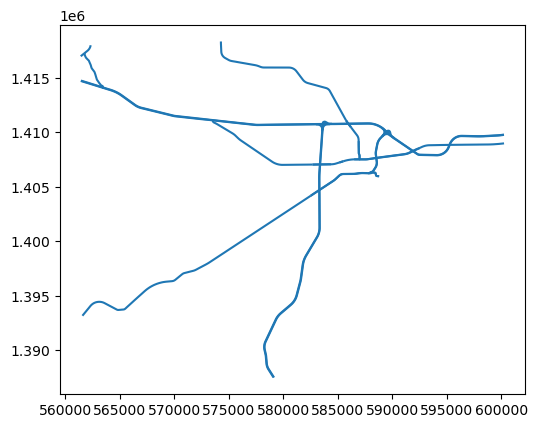

In [92]:
# Look at our new object

hw_dissolve.plot()

Now let's do the same for the buffers. First we need to create a geodataframe where the buffers are in the geometry column. (Each geodataframe can only have one geometry column). We could create a new geodataframe or edit the highways geodataframe.

In [94]:
# we'll edit highways
# first copy the highway polygons to a new column called highways
highways['highways']=highways['geometry']
highways.head()

,FID_Design,OBJECTID,LENGTH,HWYNAME,CLASS,ALT1_DESIN,ALT2_DESIN,ALT3_DESIN,ALT4_DESIN,ALT5_DESIN,ALT6_DESIN,ALT7_DESIN,Shape_Leng,COUNTY,CONAME,Shape_Length,geometry,highways
0,7,17,276463.000000,MS 12,3,,,,,,,,276462.888026,105,Oktibbeha,49174.035325,"POLYGON ((560821.520 1393799.321, 560980.734 1...","POLYGON ((560821.520 1393799.321, 560980.734 1..."
1,42,473,533449.000000,MS 15,3,,,,,,,,533448.629669,105,Oktibbeha,1394.513838,"POLYGON ((560748.409 1417683.907, 560799.072 1...","POLYGON ((560748.409 1417683.907, 560799.072 1..."
2,48,691,565231.000000,MS 25,3,,,,,,,,565230.984691,105,Oktibbeha,53270.399926,"POLYGON ((578235.046 1387008.390, 578219.099 1...","POLYGON ((578235.046 1387008.390, 578219.099 1..."
3,76,1430,2325.679932,MS 775,4,,,,,,,,2325.676707,105,Oktibbeha,2325.676707,"POLYGON ((589780.303 1405758.383, 589759.563 1...","POLYGON ((589780.303 1405758.383, 589759.563 1..."
4,220,3749,445627.000000,US 82,2,,,,,,,,445627.161195,105,Oktibbeha,47324.698902,"POLYGON ((560445.701 1414709.059, 560444.715 1...","POLYGON ((560445.701 1414709.059, 560444.715 1..."


In [95]:
# now replace the values in the geometry column with the buffer polygons
highways['geometry']=hw_buffer
highways.head()

,FID_Design,OBJECTID,LENGTH,HWYNAME,CLASS,ALT1_DESIN,ALT2_DESIN,ALT3_DESIN,ALT4_DESIN,ALT5_DESIN,ALT6_DESIN,ALT7_DESIN,Shape_Leng,COUNTY,CONAME,Shape_Length,geometry,highways
0,7,17,276463.000000,MS 12,3,,,,,,,,276462.888026,105,Oktibbeha,49174.035325,"POLYGON ((560821.520 1393799.321, 560980.734 1...","POLYGON ((560821.520 1393799.321, 560980.734 1..."
1,42,473,533449.000000,MS 15,3,,,,,,,,533448.629669,105,Oktibbeha,1394.513838,"POLYGON ((560748.409 1417683.907, 560799.072 1...","POLYGON ((560748.409 1417683.907, 560799.072 1..."
2,48,691,565231.000000,MS 25,3,,,,,,,,565230.984691,105,Oktibbeha,53270.399926,"POLYGON ((578235.046 1387008.390, 578219.099 1...","POLYGON ((578235.046 1387008.390, 578219.099 1..."
3,76,1430,2325.679932,MS 775,4,,,,,,,,2325.676707,105,Oktibbeha,2325.676707,"POLYGON ((589780.303 1405758.383, 589759.563 1...","POLYGON ((589780.303 1405758.383, 589759.563 1..."
4,220,3749,445627.000000,US 82,2,,,,,,,,445627.161195,105,Oktibbeha,47324.698902,"POLYGON ((560445.701 1414709.059, 560444.715 1...","POLYGON ((560445.701 1414709.059, 560444.715 1..."


In [93]:
highways['geometry']=hw_buffer
highways

,FID_Design,OBJECTID,LENGTH,HWYNAME,CLASS,ALT1_DESIN,ALT2_DESIN,ALT3_DESIN,ALT4_DESIN,ALT5_DESIN,ALT6_DESIN,ALT7_DESIN,Shape_Leng,COUNTY,CONAME,Shape_Length,geometry
0,7,17,276463.000000,MS 12,3,,,,,,,,276462.888026,105,Oktibbeha,49174.035325,"POLYGON ((560821.520 1393799.321, 560980.734 1..."
1,42,473,533449.000000,MS 15,3,,,,,,,,533448.629669,105,Oktibbeha,1394.513838,"POLYGON ((560748.409 1417683.907, 560799.072 1..."
2,48,691,565231.000000,MS 25,3,,,,,,,,565230.984691,105,Oktibbeha,53270.399926,"POLYGON ((578235.046 1387008.390, 578219.099 1..."
3,76,1430,2325.679932,MS 775,4,,,,,,,,2325.676707,105,Oktibbeha,2325.676707,"POLYGON ((589780.303 1405758.383, 589759.563 1..."
4,220,3749,445627.000000,US 82,2,,,,,,,,445627.161195,105,Oktibbeha,47324.698902,"POLYGON ((560445.701 1414709.059, 560444.715 1..."
5,376,6480,97637.000000,MS 182,4,,,,,,,,97636.998383,105,Oktibbeha,36648.665211,"POLYGON ((572537.836 1410950.743, 572533.295 1..."
6,377,6499,36317.101562,US 82,2,,,MS 25,,,,,36317.066342,105,Oktibbeha,35158.821467,"POLYGON ((584215.502 1411723.669, 584269.155 1..."
7,458,7259,3787.820068,MS 763,4,,,,,,,,3787.817374,105,Oktibbeha,3787.817374,"POLYGON ((560797.902 1416969.586, 560778.414 1..."
8,547,8180,42944.199219,MS 389,4,,,,,,,,43324.138603,105,Oktibbeha,21716.753644,"POLYGON ((575314.701 1417584.307, 575408.644 1..."


In [112]:
# now we can do the dissolving 
# same as we did before but this time we're operating on the buffers because that is what's now in the geometry column
hwbuff_dissolve=highways.dissolve(by='COUNTY')
hwbuff_dissolve

,geometry,FID_Design,OBJECTID,LENGTH,HWYNAME,CLASS,ALT1_DESIN,ALT2_DESIN,ALT3_DESIN,ALT4_DESIN,ALT5_DESIN,ALT6_DESIN,ALT7_DESIN,Shape_Leng,CONAME,Shape_Length,highways
COUNTY,,,,,,,,,,,,,,,,,
105,"POLYGON ((578179.153 1387098.546, 578173.940 1...",7,17,276463.0,MS 12,3,,,,,,,,276462.888026,Oktibbeha,49174.035325,"POLYGON ((560821.520 1393799.321, 560980.734 1..."


<Axes: >

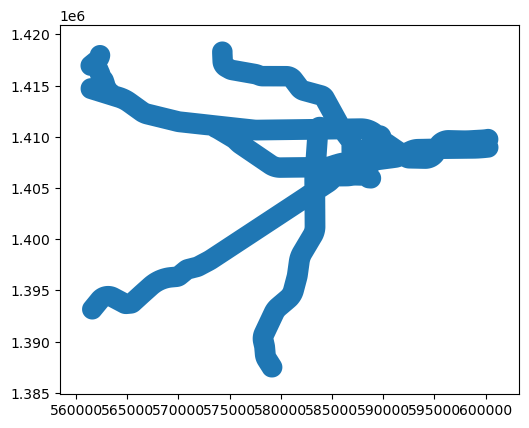

In [97]:
hwbuff_dissolve.plot()

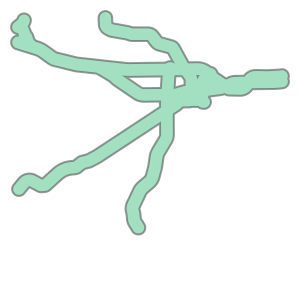

In [114]:
# if we want to pull the polygon object out of the geodataframe, it's simple
# when we grouped by COUNTY, COUNTY became the new index in the geodataframe
# use the index value (COUNTY) to access the polygon in the geometry column
buff_poly=hwbuff_dissolve.loc[105,'geometry']
buff_poly

### make a bunch of different sized buffers in a loop

In [119]:
# reload the data file to eliminate the edits we made to the highways geodataframe
highways=gpd.read_file(gdb_file,layer='desig_hwys_105')

# empty dictionary to hold the variable names as keys and each buffer polygon as items
varnames={}

d=2000
while d<=10000:
    buff_name='hwbuff_'+str(int(d/1000))+'km' # variable name (keys in the dictionary)
    buff=highways.buffer(d) # create buffer polygons
    buff_poly=buff.unary_union # dissolve to single polygon
    varnames[buff_name]=buff_poly # save to dictionary
    d+=2000 # increment d by 2 km

varnames

{'hwbuff_2km': <POLYGON ((576401.53 1389265.726, 576395.713 1389291.58, 576384.789 1389339....>,
 'hwbuff_4km': <POLYGON ((574420.848 1388956.136, 574408.973 1389008.886, 574403.567 138903...>,
 'hwbuff_6km': <POLYGON ((576922.221 1381905.394, 576385.152 1382146.758, 575874.327 138243...>,
 'hwbuff_8km': <POLYGON ((576192.887 1380043.118, 575476.795 1380364.936, 574795.695 138075...>,
 'hwbuff_10km': <POLYGON ((574568.438 1378583.115, 573717.062 1379071.188, 572917.626 137964...>}

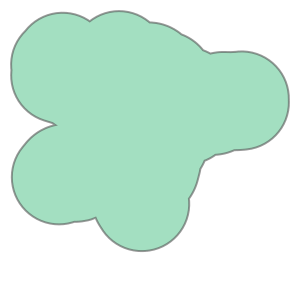

In [131]:
# check out one of the polygons we made and stored in the dictionary
varnames['hwbuff_10km']

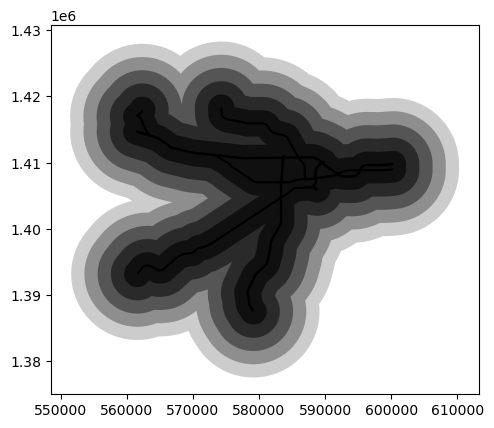

In [149]:
fig, ax = plt.subplots()
highways.plot(ax=ax,color='black')
alpha=.2

for km in range(10,0,-2):
    gpd.GeoSeries(varnames['hwbuff_'+str(km)+'km']).plot(ax=ax,color='black',alpha=alpha)
    alpha+=0.1

plt.show()

In [ ]:
fiona.listlayers(gdb_file)
# fiona.listlayers(town_file)

['Schools',
 'VolusiaCounty',
 'Highways',
 'co_105',
 'pop_pl_105',
 'public_schools',
 'desig_hwys_105']

In [ ]:
# get layer names, geometry types, projected coordinate system names

for layer_name in fiona.listlayers(gdb_file):
    # using fiona above to loop thru the list of layer names

    # read a layer, .read_file can read shp and gdb
    gdf=gpd.read_file(gdb_file,layer=layer_name) 

    # .geom_type returns the geometry for every data record in the layer
    # .unique() returns a list of only 1 type if all records have the same geometry
    geom_type=gdf.geom_type.unique()  

    # .crs returns spatial reference information, get the name of the projected coord system
    sr_name=gdf.crs.name

    print("Feature class name: {} \nGeometry Type: {}\nProjected Coordinate System: {}"
        "\n".format(layer_name, geom_type, sr_name))

#### Using osgeo + gdal

In [ ]:
# these packages won't always throw errors if something goes wrong
# we have to turn on exceptions if we want this behavior and do a little extra error catching
ogr.UseExceptions()

# get the appropriate driver for reading gdb
try: driver_gdb=ogr.GetDriverByName("OpenFileGDB")
except Exception as e: sys.exit(e)

# open the gdb as read only (0)
try: gdb=driver_gdb.Open(gdb_file,0)
except Exception as e: sys.exit(e)

In [ ]:
# get layer names, geometry types, projected coordinate system names
for ilayer in range(gdb.GetLayerCount()):
    # using gdal above to loop thru a list of layer indexes

    # read a layer
    fclass=gdb.GetLayerByIndex(ilayer)
    
    # get the layer name
    layer_name=fclass.GetName()

    # get geometry type
    geom_type=ogr.GeometryTypeToName(fclass.GetGeomType())

    # .GetSpatialRef() returns spatial reference information, get the name of the projected coord system
    sr_name=fclass.GetSpatialRef().GetAttrValue('PROJCS')
    
    print("Feature class name: {} \nGeometry Type: {}\nProjected Coordinate System: {}"
        "\n".format(layer_name,geom_type, sr_name))    